In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn import *

In [2]:
data = pd.read_csv('EURUSD_200629_200704.csv', delimiter = ',')
data

,<TICKER>,<PER>,<DATE>,<TIME>,<OPEN>,<HIGH>,<LOW>,<CLOSE>,<VOL>
0,EURUSD,1,29/06/20,00:01:00,1.12193,1.12220,1.12176,1.12190,7
1,EURUSD,1,29/06/20,00:02:00,1.12167,1.12220,1.12157,1.12220,16
2,EURUSD,1,29/06/20,00:03:00,1.12190,1.12190,1.12190,1.12190,1
3,EURUSD,1,29/06/20,00:04:00,1.12192,1.12198,1.12192,1.12198,2
4,EURUSD,1,29/06/20,00:05:00,1.12197,1.12230,1.12197,1.12220,5
...,...,...,...,...,...,...,...,...,...
7193,EURUSD,1,03/07/20,23:56:00,1.12461,1.12517,1.12456,1.12517,34
7194,EURUSD,1,03/07/20,23:57:00,1.12518,1.12518,1.12465,1.12465,31
7195,EURUSD,1,03/07/20,23:58:00,1.12484,1.12484,1.12395,1.12413,91
7196,EURUSD,1,03/07/20,23:59:00,1.12405,1.12472,1.12396,1.12472,123


In [3]:
df = data.drop(['<TICKER>', '<PER>', '<DATE>', '<TIME>', '<HIGH>', '<LOW>', '<CLOSE>'], axis = 1)
df

,<OPEN>,<VOL>
0,1.12193,7
1,1.12167,16
2,1.12190,1
3,1.12192,2
4,1.12197,5
...,...,...
7193,1.12461,34
7194,1.12518,31
7195,1.12484,91
7196,1.12405,123


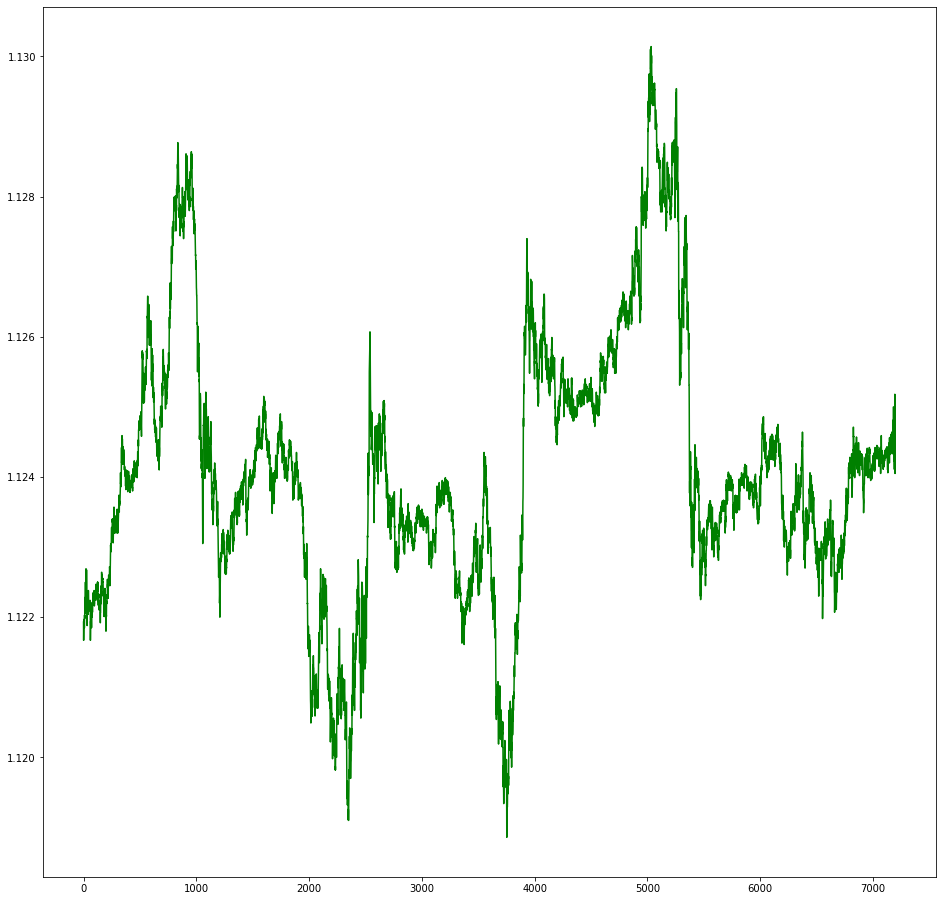

In [4]:
# Рисуем график цены <OPEN>
plt.figure(figsize = (16, 16))
plt.plot(df['<OPEN>'], color = 'g')

In [16]:
# Преобразуем столбец <OPEN> так: <OPEN> = цена_текущая - цена_предыдущая
df['TMP1'] = df['<OPEN>'].shift(1)
df['TMP2'] = df['<OPEN>']
i = pd.notnull(df['TMP1'])
df2 = df.loc[i, ['<VOL>', '<OPEN>', 'TMP1', 'TMP2']]
df2.index = df2.index - 1
df2['<OPEN>'] = df2['<OPEN>'] - df2['TMP1']

# Создаем столбец UPDOWN для определения роста или падения цены
df2['UPDOWN'] = np.sign(df2['<OPEN>'])
df2

,<VOL>,<OPEN>,TMP1,TMP2,UPDOWN
0,16,-0.00026,1.12193,1.12167,-1.0
1,1,0.00023,1.12167,1.12190,1.0
2,2,0.00002,1.12190,1.12192,1.0
3,5,0.00005,1.12192,1.12197,1.0
4,77,-0.00012,1.12197,1.12185,-1.0
...,...,...,...,...,...
7192,34,-0.00009,1.12470,1.12461,-1.0
7193,31,0.00057,1.12461,1.12518,1.0
7194,91,-0.00034,1.12518,1.12484,-1.0
7195,123,-0.00079,1.12484,1.12405,-1.0


In [40]:
X = df2[['<VOL>','TMP1', 'TMP2']]
Y = df2['UPDOWN']
X_train, X_test, Y_train, Y_test = model_selection.train_test_split(
    X, Y, test_size = 0.9, random_state = 0)
Y_train

5509    1.0
5505   -1.0
7176    1.0
7118    1.0
1006   -1.0
       ... 
4931   -1.0
3264   -1.0
1653   -1.0
2607   -1.0
2732    1.0
Name: UPDOWN, Length: 719, dtype: float64

In [41]:
Tree = tree.DecisionTreeClassifier(max_depth = 20)
Tree.fit(X_train, Y_train)

prediction = Tree.predict(X_test)
print("Accuracy:", Tree.score(X_test, Y_test))
prediction

Accuracy: 0.7287743130595863


array([-1., -1.,  1., ..., -1., -1.,  1.])

In [42]:
# Считаем количество успехов и неудач.
success = 0
failure = 0
index = [i for i in range(len(Y_test))]
Y_test.index = index
for i in range(len(Y_test)):
    if prediction[i] == Y_test[i]:
        success += 1
    else:
        failure += 1
print(success, failure)

4721 1757
